In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

### Scikit-Learn Mean/Median Imputation
--------------------------------

#### SimpleImputer

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


In [24]:
# we use only the following variables for this
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [25]:
# let's load the House Prices dataset

data = pd.read_csv('data/housing.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [26]:
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

In [27]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

x_train, x_test, y_train, y_test = train_test_split(
    data[cols_to_use], # just the features
    data['SalePrice'], # the target
    test_size=0.3, # the percentage of obs in the test set
    random_state=0
) # for reproducibility
x_train.shape, x_test.shape

((1022, 9), (438, 9))

In [28]:
# let's check the misssing data again
x_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

#### SimpleImputer on the entire dataset

In [29]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the median
imputer = SimpleImputer(strategy='median')

# we fit the imputer to the train set
# the imputer will learn the median of all variables
imputer.fit(x_train[cols_to_use])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [31]:
# and we can investigate the medians directly to corroborate
# the imputer did a good job
x_train[cols_to_use].median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [32]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

x_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [33]:
# if we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

pd.DataFrame(x_train, columns=cols_to_use).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


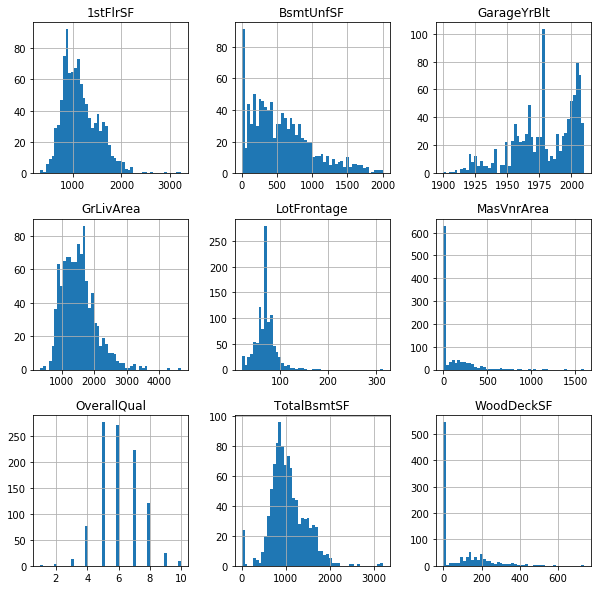

In [34]:
# Let's explore the change in the distributions after the median imputation

x_train = pd.DataFrame(x_train, columns=cols_to_use)
x_test = pd.DataFrame(x_test, columns=cols_to_use)

x_train.hist(bins=50, figsize=(10,10))
plt.show()

In [35]:
# first we need to make lists, indicating which features
# will be imputed with each method

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea', 'GarageYrBlt']

In [36]:
# then we instantiate the imputers, within a pipeline
# we create one mean imputer and one median imputer
# by changing the parameter in the strategy

numeric_mean_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

numeric_median_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])


In [37]:
# then we put the features list and the transformers together
# using the column transformer

# we need to add remainder = True to indicate what we want
# ALL the columns returned at the end of the transformation
# and not just the engineered ones, which is the default
# behaviour of ColumnTransformer. 

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', numeric_mean_imputer, numeric_features_mean),
    ('median_imputer', numeric_median_imputer, numeric_features_median)
], remainder='passthrough')


In [38]:
# now we fit the preprocessor
preprocessor.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('mean_imputer',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 Pipeline(memory=None,
              

In [39]:
# we can explore the transformers like this:
preprocessor.transformers

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt'])]

In [40]:
# and we can look at the parameters learnt like this:

# for the mean imputer
preprocessor.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([69.54500978])

In [41]:
# and we can corroborate the value with that one in
# the train set
x_train[numeric_features_mean].mean()

LotFrontage    69.54501
dtype: float64

In [42]:
# for the median imputerthere are 2 values learnt
# because we want to impute 2 different variables
preprocessor.named_transformers_['median_imputer'].named_steps['imputer'].statistics_

array([   0., 1979.])

In [43]:
# and we corroborate those values in the train set
x_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [44]:
# and now we can impute the data
x_train = preprocessor.transform(x_train)

# and check it worked
np.mean(np.isnan(x_train))

0.0

In [45]:
# for test
x_test = preprocessor.transform(x_test)

# and check it worked
np.mean(np.isnan(x_test))

0.0

In [47]:
x_train, x_train.shape

(array([[  69.,  573., 1998., ..., 2034.,  576.,  318.],
        [  69.,    0., 1996., ..., 1291.,  307.,  288.],
        [  50.,    0., 1979., ...,  858.,  117.,  162.],
        ...,
        [  68.,    0., 1978., ..., 1902.,    0.,    0.],
        [  69.,   18., 2003., ..., 1557.,  143., 1374.],
        [  58.,   30., 1998., ..., 1839.,    0., 1195.]]), (1022, 9))

In [48]:
# if we want to put the array back into a dataframe, we need
# to be careful with the column order

# like this, we can explore the features used in each transformer
# including those in the remainder (the ones that were not transformed)
preprocessor.transformers_

[('mean_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('median_imputer', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='median',
                                 verbose=0))],
           verbose=False), ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]

---------------------------
'remainder', 'passthrough', [0, 1, 2, 3, 4, 5]

the code above tells us that the remainder columns are those in position 0, 1, 2, 3, 4, 5 of the X_train

In [49]:
# let's capture the columns in a list

remainder_cols = [cols_to_use[c] for c in [0, 1, 2, 3, 4, 5]]
remainder_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF']

In [51]:
# capture the data back in a dataframe
pd.DataFrame(x_train, columns=numeric_features_mean+numeric_features_median+remainder_cols).head()

,LotFrontage,MasVnrArea,GarageYrBlt,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF
0,69.0,573.0,1998.0,7.0,1057.0,1057.0,2034.0,576.0,318.0
1,69.0,0.0,1996.0,6.0,1291.0,1291.0,1291.0,307.0,288.0
2,50.0,0.0,1979.0,5.0,858.0,858.0,858.0,117.0,162.0
3,60.0,0.0,1939.0,6.0,560.0,698.0,1258.0,0.0,356.0
4,60.0,0.0,1930.0,2.0,290.0,438.0,438.0,0.0,0.0


### Scikit-Learn Arbitary Value Imputation


In [53]:
cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

data = pd.read_csv('data/housing.csv', usecols=cols_to_use)
print(data.shape)
print(data.isnull().mean())

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

x_train, x_test, y_train, y_test = train_test_split(
    data[cols_to_use], # just the features
    data['SalePrice'], # the target
    test_size=0.3, # the percentage of obs in the test set
    random_state=0 # for reproducibility
) 
print(x_train.shape, x_test.shape)

(1460, 10)
LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64
(1022, 9) (438, 9)


In [54]:
# simple imputer with arbitary value

imputer = SimpleImputer(strategy="constant", fill_value=999)

imputer.fit(x_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=999,
              missing_values=nan, strategy='constant', verbose=0)

In [55]:
imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [56]:
# impute train and test sets
# this returns a numpy array NOT DATAFRAME
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)
x_train

array([[   7., 1057., 1057., ...,  999.,  573., 1998.],
       [   6., 1291., 1291., ...,  999.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  999.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  999.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [57]:
# convert back to dataframe
x_train = pd.DataFrame(x_train, columns=cols_to_use)
x_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,999.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,999.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,999.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


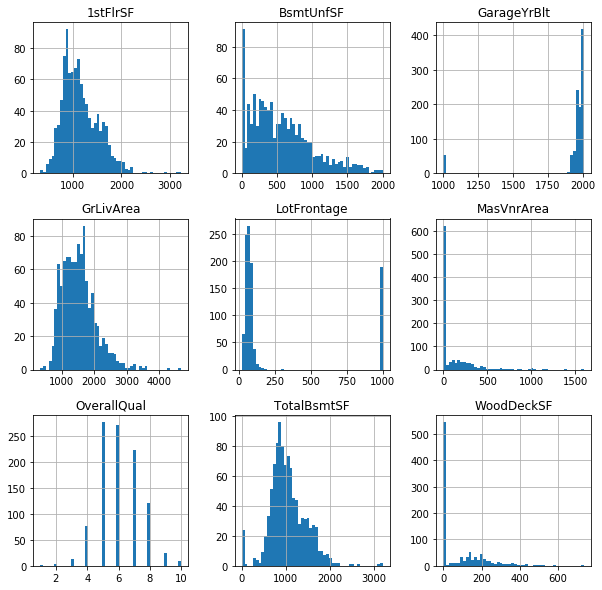

In [58]:
x_train.hist(bins=50, figsize=(10, 10))
plt.show();

In [67]:
# different imputations for different features
x_train, x_test, y_train, y_test = train_test_split(
    data[cols_to_use], # just the features
    data['SalePrice'], # the target
    test_size=0.3, # the percentage of obs in the test set
    random_state=0 # for reproducibility
) 
print(x_train.shape, x_test.shape)
x_train.isna().mean()

(1022, 9) (438, 9)


OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

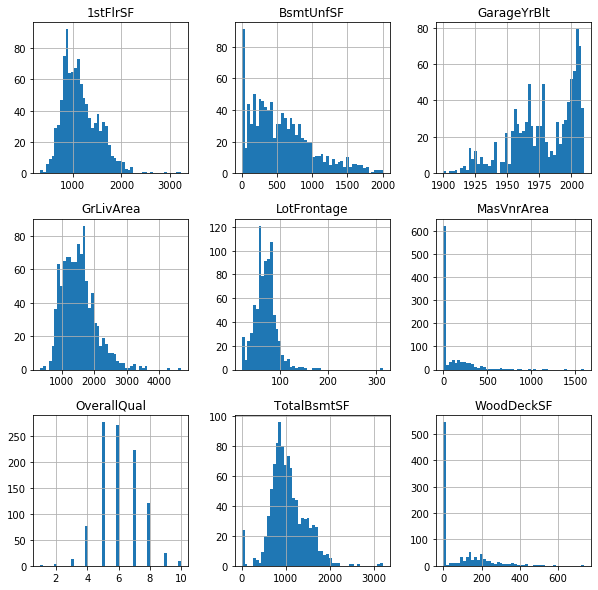

In [68]:
# let's look at the distributions of the variables to decide
# which arbitrary value to use for each feature

x_train.hist(bins=50, figsize=(10,10))
plt.show()

In [69]:
features_LotFrontAge = ["LotFrontage"]
features_MasVnrArea = ['MasVnrArea']
features_GarageYrBlt = ['GarageYrBlt']

# then we instantiate the imputers, within a pipeline
# we create one imputer per feature
# within the imputer I indicate the arbitrary value
# which is differet for each variable

imputer_LotFrontAge = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value=999)),]
)

imputer_MasVnrArea = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value=-10)),]
)

imputer_GarageYrBlt = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value=1700)),]
)

# then we put the features list and the transformers together
# using the column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("imputer_LotFrontAge", imputer_LotFrontAge, features_LotFrontAge),
        ("imputer_MasVnrArea", imputer_MasVnrArea, features_MasVnrArea),
        ("imputer_GarageYrBlt", imputer_GarageYrBlt, features_GarageYrBlt)
    ]
)


In [70]:
# fit the preprocessor
preprocessor.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('imputer_LotFrontAge',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=999,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage']),
                                ('imputer_MasVnrArea',
                                 Pipeline(memory=...
         

In [71]:
preprocessor.transformers

[('imputer_LotFrontAge', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=999,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('imputer_MasVnrArea', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=-10,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['MasVnrArea']),
 ('imputer_GarageYrBlt', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=1700,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['GarageYrBlt'])]

In [74]:
# and we can look at the parameters learnt like this:
# for LotFrontAge
preprocessor.named_transformers_['imputer_LotFrontAge'].named_steps['imputer'].statistics_

array([999.])

In [75]:
# for MasVnrArea
preprocessor.named_transformers_['imputer_MasVnrArea'].named_steps['imputer'].statistics_

array([-10.])

In [77]:
# for GarageYrBlt
preprocessor.named_transformers_['imputer_GarageYrBlt'].named_steps['imputer'].statistics_

array([1700.])

In [78]:
# and now we can impute the data
x_train = preprocessor.transform(x_train)
x_test = preprocessor.transform(x_test)

x_train

array([[ 999.,  573., 1998.],
       [ 999.,    0., 1996.],
       [  50.,    0., 1700.],
       ...,
       [  68.,    0., 1978.],
       [ 999.,   18., 2003.],
       [  58.,   30., 1998.]])

In [79]:
pd.DataFrame(
    x_train,
    columns=features_LotFrontAge + features_MasVnrArea + features_GarageYrBlt
).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,999.0,573.0,1998.0
1,999.0,0.0,1996.0
2,50.0,0.0,1700.0
3,60.0,0.0,1939.0
4,60.0,0.0,1930.0


### Scikit-Learn Frequent Category Imputation


In [81]:
cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'MSZoning', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
   'Street', 'Alley', 'SalePrice'
]

data = pd.read_csv('data/housing.csv', usecols=cols_to_use)
print(data.shape)
print(data.isnull().mean())

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

x_train, x_test, y_train, y_test = train_test_split(
    data[cols_to_use], # just the features
    data['SalePrice'], # the target
    test_size=0.3, # the percentage of obs in the test set
    random_state=0 # for reproducibility
) 
print(x_train.shape, x_test.shape)

(1460, 9)
MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
Alley          0.937671
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64
(1022, 8) (438, 8)


In [82]:
# create an instance of the simple imputer
# we indicate that we want to impute with the 
# most frequent category
imputer = SimpleImputer(strategy="most_frequent")

# fit the imputer to the train set the imputer will learn the mode of ALL variables
# categorical or not
imputer.fit(x_train[cols_to_use])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [83]:
imputer.statistics_

array(['TA', 'Gd', 'RL', 0, 60.0, 0.0, 'Pave', 'Pave'], dtype=object)

In [84]:
# and we can investigate the frequent values to corroborate
# the imputer did a good job
x_train[cols_to_use].mode()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,TA,Gd,RL,0,60.0,0.0,Pave,Pave


In [85]:
# now transform the data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)
x_train

array([['Gd', 'Gd', 'RL', ..., 573.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ['TA', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ...,
       ['TA', 'Gd', 'RM', ..., 0.0, 'Pave', 'Pave'],
       ['Gd', 'TA', 'RL', ..., 18.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 30.0, 'Pave', 'Pave']], dtype=object)

In [87]:
pd.DataFrame(x_train, columns=cols_to_use).head()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,Gd,Gd,RL,318,60,573,Pave,Pave
1,Gd,Gd,RL,288,60,0,Pave,Pave
2,TA,Gd,RL,162,50,0,Pave,Pave
3,TA,Gd,RL,356,60,0,Pave,Pave
4,TA,Gd,RL,0,60,0,Pave,Pave


In [100]:
### Multiple imputations for different features

x_train, x_test, y_train, y_test = train_test_split(
    data[cols_to_use], # just the features
    data['SalePrice'], # the target
    test_size=0.3, # the percentage of obs in the test set
    random_state=0 # for reproducibility
) 
print(x_train.shape, x_test.shape)

(1022, 8) (438, 8)


In [101]:
# list out the categorical and numerical features seperately
features_numeric = ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea',]
features_categorical = ['BsmtQual', 'FireplaceQu', 'MSZoning', 'Street', 'Alley']

In [102]:
# create imputers for each of the types
numeric_imputer = Pipeline(
    steps=[
        ("numeric_imputer", SimpleImputer(strategy="mean")),
    ]
)

categorical_imputer = Pipeline(
    steps=[
        ("categorical_imputer", SimpleImputer(strategy="most_frequent")),
    ]
)

In [103]:
# combine the pipelines by using column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric_imputer", numeric_imputer, features_numeric),
        ("categorical_imputer", categorical_imputer, features_categorical),
    ]
)

In [104]:
preprocessor.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('numeric_imputer',
                                 Pipeline(memory=None,
                                          steps=[('numeric_imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0))],
                                          verbose=False),
                                 ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
                                ('categorical_imputer',
                                 

In [105]:
preprocessor.transformers

[('numeric_imputer', Pipeline(memory=None,
           steps=[('numeric_imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0))],
           verbose=False), ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
 ('categorical_imputer', Pipeline(memory=None,
           steps=[('categorical_imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='most_frequent',
                                 verbose=0))],
           verbose=False), ['BsmtQual',
   'FireplaceQu',
   'MSZoning',
   'Street',
   'Alley'])]

In [106]:
# and now we can impute the data
x_train = preprocessor.transform(x_train)
x_test = preprocessor.transform(x_test)

In [108]:
# see how the result of the imputation is a 3 column dataset
x_train = pd.DataFrame(x_train, columns=features_numeric + features_categorical)
x_train.head()

,BsmtUnfSF,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,318,69.6687,573,Gd,Gd,RL,Pave,Pave
1,288,69.6687,0,Gd,Gd,RL,Pave,Pave
2,162,50,0,TA,Gd,RL,Pave,Pave
3,356,60,0,TA,Gd,RL,Pave,Pave
4,0,60,0,TA,Gd,RL,Pave,Pave


In [109]:
x_train.isnull().mean()

BsmtUnfSF      0.0
LotFrontage    0.0
MasVnrArea     0.0
BsmtQual       0.0
FireplaceQu    0.0
MSZoning       0.0
Street         0.0
Alley          0.0
dtype: float64

### Scikit-Learn Missing Category Imputation


In [110]:
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('data/housing.csv', usecols=cols_to_use)
print(data.shape)
print(data.isnull().mean())

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

x_train, x_test, y_train, y_test = train_test_split(
    data[cols_to_use], # just the features
    data['SalePrice'], # the target
    test_size=0.3, # the percentage of obs in the test set
    random_state=0 # for reproducibility
) 
print(x_train.shape, x_test.shape)

(1460, 3)
BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64
(1022, 2) (438, 2)


In [111]:
# inspect the value of categorical variable
x_train["BsmtQual"].unique()

array(['Gd', 'TA', 'Fa', nan, 'Ex'], dtype=object)

In [112]:
x_train["FireplaceQu"].unique()

array([nan, 'Gd', 'TA', 'Fa', 'Po', 'Ex'], dtype=object)

In [113]:
# create an imputer with constant fill
imputer = SimpleImputer(strategy="constant", fill_value="MISSING")
imputer.fit(x_train)

SimpleImputer(add_indicator=False, copy=True, fill_value='MISSING',
              missing_values=nan, strategy='constant', verbose=0)

In [114]:
imputer.statistics_

array(['MISSING', 'MISSING'], dtype=object)

In [115]:
# impute train and test
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)
x_train


array([['Gd', 'MISSING'],
       ['Gd', 'Gd'],
       ['TA', 'MISSING'],
       ...,
       ['MISSING', 'MISSING'],
       ['Gd', 'TA'],
       ['Gd', 'MISSING']], dtype=object)

### Scikit-Learn MissingIndicator


- [MissingIndicaror](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html#sklearn.impute.MissingIndicator)

In [127]:
from sklearn.impute import MissingIndicator

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'MSZoning', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
    'Street', 'Alley', 'SalePrice'
]
data = pd.read_csv('data/housing.csv', usecols=cols_to_use)
print(data.shape)
print(data.isnull().mean())

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

x_train, x_test, y_train, y_test = train_test_split(
    data[cols_to_use], # just the features
    data['SalePrice'], # the target
    test_size=0.3, # the percentage of obs in the test set
    random_state=0 # for reproducibility
) 
print(x_train.shape, x_test.shape)

(1460, 9)
MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
Alley          0.937671
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64
(1022, 8) (438, 8)


In [128]:
## ADDING A MISSING INDICATOR

indicator = MissingIndicator(error_on_new=True, features="missing-only")
indicator.fit(x_train)

MissingIndicator(error_on_new=True, features='missing-only', missing_values=nan,
                 sparse='auto')

In [129]:
indicator.features_

array([0, 1, 4, 5, 7])

In [130]:
# we can find the feature names by passing the index to the
# list of columns

x_train.columns[indicator.features_]

Index(['BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'Alley'], dtype='object')

In [132]:
tmp = indicator.transform(x_train)
tmp

array([[False,  True,  True, False,  True],
       [False, False,  True, False,  True],
       [False,  True, False, False,  True],
       ...,
       [ True,  True, False, False,  True],
       [False, False,  True, False,  True],
       [False,  True, False, False,  True]])

In [133]:
# let's create a column name for each of the new MissingIndicators
indicator_cols = [c + "_NA" for c in x_train.columns[indicator.features_]]
indicator_cols

['BsmtQual_NA',
 'FireplaceQu_NA',
 'LotFrontage_NA',
 'MasVnrArea_NA',
 'Alley_NA']

In [134]:
x_train = pd.concat([
    x_train.reset_index(),
    pd.DataFrame(tmp, columns=indicator_cols)],
    axis=1
)
x_train.head()

,index,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley,BsmtQual_NA,FireplaceQu_NA,LotFrontage_NA,MasVnrArea_NA,Alley_NA
0,64,Gd,NaN,RL,318,NaN,573.0,Pave,NaN,False,True,True,False,True
1,682,Gd,Gd,RL,288,NaN,0.0,Pave,NaN,False,False,True,False,True
2,960,TA,NaN,RL,162,50.0,0.0,Pave,NaN,False,True,False,False,True
3,1384,TA,NaN,RL,356,60.0,0.0,Pave,NaN,False,True,False,False,True
4,1100,TA,NaN,RL,0,60.0,0.0,Pave,NaN,False,True,False,False,True


In [135]:
tmp = indicator.transform(x_test)
x_test = pd.concat([
    x_test.reset_index(),
    pd.DataFrame(tmp, columns=indicator_cols)],
    axis=1
)
x_test.head()

,index,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley,BsmtQual_NA,FireplaceQu_NA,LotFrontage_NA,MasVnrArea_NA,Alley_NA
0,529,TA,TA,RL,816,NaN,NaN,Pave,NaN,False,False,True,True,True
1,491,TA,TA,RL,238,79.0,0.0,Pave,NaN,False,False,False,False,True
2,459,TA,TA,RL,524,NaN,161.0,Pave,NaN,False,False,True,False,True
3,279,Gd,TA,RL,768,83.0,299.0,Pave,NaN,False,False,False,False,True
4,655,TA,NaN,RM,525,21.0,381.0,Pave,NaN,False,True,False,False,True


### Scikit-Learn Automatic Detection of best Imputation method



In [136]:
import pandas as pd
import numpy as np

# import classes for imputation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# import extra classes for modelling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)


In [137]:
data = pd.read_csv('data/housing.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [150]:
features_categorical = list(data.select_dtypes(include="object").columns)
features_numerical = list(data.select_dtypes(include=np.number).columns)
# removing target variable 
features_numerical.remove("SalePrice")
len(features_numerical), len(features_categorical)

(37, 43)

In [151]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1), # just the features
    data['SalePrice'], # the target
    test_size=0.3, # the percentage of obs in the test set
    random_state=0 # for reproducibility
) 
print(x_train.shape, x_test.shape)

(1022, 80) (438, 80)


In [152]:
# create the preprocessing pipelines for both
# numerical and categorical data

numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)


categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="MISSING")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)


preprocesor = ColumnTransformer(
    tranasformers=[
        ("numercial", numerical_transformer, f)
    ]
)

ValueError: not enough values to unpack (expected 2, got 0)